In [67]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from math import *
import numpy as np

We can now define some useful functions

In [ ]:
def prod(A,b):
    c = []
    for i in range(len(b)):
        c.append(sum([A[i][j] * b[j] for j in range(len(b))]))
    return(c)

def triDiag1(n):
    A = [[0 for j in range(n)] for i in range(n)]
    A[0][0] = 2
    for i in range(1,n):
        A[i][i] = 2
        A[i-1][i] = 1
        A[i][i-1] = 1
    
    return A

Jacobi iteration: $$x_i^{(k+1)} = \frac{b_i - \sum_{j \neq i} a_{ij} x_j^{(k)}}{a_{ii}}$$

In [61]:
def jacobiIteration(x_k,A,b):
    x_k1 = []
    for i in range(len(x_k)):
        C = sum([A[i][j] * x_k[j] for j in range(i)]) + sum([A[i][j] * x_k[j] for j in range(i+1,len(b))])
        x_k1.append((b[i] - C)/A[i][i])
    return(x_k1)

        

Gauss Seidel iteration: $$x_i^{(k+1)}=\frac{b_i-\sum_{j<i}a_{ij}x_j^{(k+1)}-\sum_{j>i}a_{ij}x_j^{(k)}}{a_{ii}}$$

In [64]:
def GaussSeidelIt(x_k,A,b):
    x_k1 = []
    for i in range(len(x_k)):
        C= sum([A[i][j]*x_k1[j] for j in range(i)])
        D= sum([A[i][j]*x_k[j] for j in range(i+1,len(b))])
        x_k1.append((b[i]-C-D)/A[i][i])
    return(x_k1)
 

Let's define now a function to test the convergence of the iterative smoothers

In [59]:
def test(A,b,xi,iteration,niter,xe,titolo):
    asse_x = [float(i) for i  in range(0,niter+1)]
    asse_y = [sqrt(sum([(xi[j]-xe[j])**2 for j in range(len(xe))]))]

    
    for i in range(niter):
        xi = iteration(xi,A,b)
        norm = sqrt(sum([(xi[j]-xe[j])**2 for j in range(len(xe))]))
        asse_y.append(norm)

    plt.plot(asse_x,asse_y)
    plt.title(titolo)
    plt.xlabel("Iterations")
    plt.ylabel("|| e^k ||")
    plt.grid()
    plt.show()

Since $\{e^{i2k\pi}\}_{k\in \mathbb{N}}$ is a complete base, we can write every $x^{(k)}$ as a linear combination of different frequency base elements, so now we can easily study the speed of attenuation of different Fourier modes

In [ ]:
#Let's create a list of lists [freq*n, niter] to do the tests easily
testList = [[1,1000],
            [2,250],
            [3,75],
            [4,30],
            [30,30],
            [50,30]]

In [ ]:
n = 50
A = triDiag1(n)
xe = [1. for i in range(n)]     
b = prod(A,xe)
x0 = [0. for i in range(n)]     #frequency = 0
test(A,b,x0,jacobiIteration,4000,xe,"Jacobi - freq 0")

x0 = [0. for i in range(n)]     #frequency = 0
test(A,b,x0,GaussSeidelIt,40,xe,"Gauss Seidel - freq 0")

In [ ]:
for case in testList:
    x0 = [sin(2*pi*i*case[0]/n) + 1 for i in range(n)]
    test(A,b,x0,jacobiIteration,case[1],xe,"Jacobi - freq "+str(case[0])+"/n")

In [ ]:
for case in testList:
    x0 = [sin(2*pi*i*case[0]/n) + 1 for i in range(n)]
    test(A,b,x0,GaussSeidelIt,case[1],xe,"Gauss Seidel - freq "+str(case[0])+"/n")

In [55]:
def poissonMatrix(n):
    size = n * (n-2) + 2 * (n - 2)
    #matrix initialization
    A = [[0 for j in range(size)] for i in range(size)]

    #matrix rows corresponding to upper boundary conditions
    for i in range(n-2):
        A[i][i] = 1
    
    for i in range(n-2, size - (n-2)):
        if ((i - (n-2)) % n == 0) or ((i - (n-2 + n - 1))%n==0):
            A[i][i] = 1
        else:
            A[i][i] = 4
            A[i][i-1] = -1
            A[i][i+1] = -1
            A[i][i - (n-1)] = -1
            A[i][i + (n-1)] = -1

    #for the lower boundary conditions
    for i in range(size - (n-2), size):
        A[i][i] = 1
    
    return A

def testF(n,g,f):
    out = []
    for i in range(n-2):
        out.append(g[i])

    for i in range(n-2):
        out.append(g[2*i + (n-2)])
        for j in range(n-2):
            out.append(f[i*(n-2) + j])
        out.append(g[2*i + (n-2)+1])

    for i in range(len(g) - (n-2), len(g)):
        out.append(g[i])
    
    return out

def formatSol(n,u):
    out = []
    temp = [0]


    for i in range(n-2):
        temp.append(u[i])
    temp.append(0)

    out.append(temp)

    for i in range(n-2):
        temp = []
        for j in range((n-2)+(i*n),(n-2)+((i+1)*n)):
            temp.append(u[j])
        out.append(temp)

    temp = [0]
    for i in range(len(u)-(n-2),len(u)):
        temp.append(u[i])
    temp.append(0)
    out.append(temp)

    return out


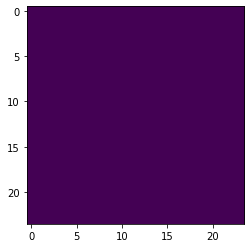

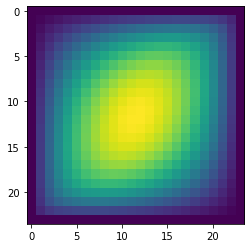

/tmp/ipykernel_3477/2238132931.py:34: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


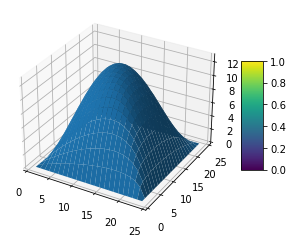

In [111]:
N = 24
mat = poissonMatrix(N)

g = [0 for i in range((N-2) * 4)]
fi = [0.5 for i in range((N-2) * (N-2))]
#fi[int((N-2)/2)*(N-2)+int((N-2)/2)] = 0

f = testF(N,g,fi)

u0 = [0 for i in range(len(mat))]

sol = formatSol(N,u0)

s0 = np.matrix(sol)
plt.imshow(s0)
plt.show()

niter = 100
for i in range(niter):
    u0 = GaussSeidelIt(u0,mat,f)

sol = formatSol(N,u0)

s1 = np.matrix(sol)
plt.imshow(s1)
plt.show()

X = np.arange(1,N+1)
Y = np.arange(1,N+1)

X,Y = np.meshgrid(X,Y)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,s1)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()